In [ ]:
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [ ]:
# Initialising the CNN
classifier = Sequential()

In [ ]:
#Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
# Step 3 - Flattening
classifier.add(Flatten())

In [ ]:
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


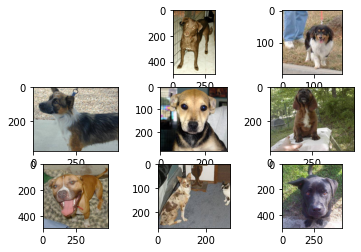

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/dataset/training_set/dogs/'
# plot first few images
for i in range(1, 9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'dog.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

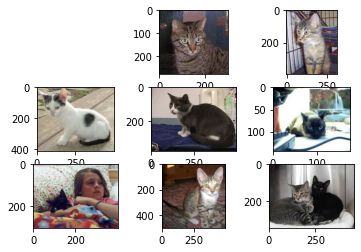

In [ ]:
# plot dog photos from the dogs vs cats dataset
from matplotlib import pyplot
from matplotlib.image import imread
# define location of dataset
folder = '/content/drive/My Drive/dataset/training_set/cats/'
# plot first few images
for i in range(1, 9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'cat.' + str(i) + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

In [ ]:
!ls


drive  sample_data


In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

#Note that the test data shouldn’t be augmented!
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8037 images belonging to 2 classes.
Found 8037 images belonging to 2 classes.


In [ ]:

classifier.fit_generator(training_set,
                         epochs = 5,
                         shuffle=True)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
252/252 [==============================] - 1941s 8s/step - loss: 0.6945 - accuracy: 0.5507
Epoch 2/5
252/252 [==============================] - 34s 135ms/step - loss: 0.6119 - accuracy: 0.6620
Epoch 3/5
252/252 [==============================] - 34s 134ms/step - loss: 0.5697 - accuracy: 0.7015
Epoch 4/5
252/252 [==============================] - 34s 134ms/step - loss: 0.5247 - accuracy: 0.7436
Epoch 5/5
252/252 [==============================] - 34s 133ms/step - loss: 0.4927 - accuracy: 0.7534


In [ ]:
print (classifier.evaluate_generator(test_set))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.4369942843914032, 0.7965658903121948]


In [ ]:
# Part 3 - Making new predictions

import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
    print (prediction)
else:
    prediction = 'cat'
    print (prediction)

cat


In [ ]:
import sys
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	# load model
	model = VGG16(include_top=False, input_shape=(224, 224, 3))
	# mark loaded layers as not trainable
	for layer in model.layers:
		layer.trainable = False
	# add new classifier layers
	flat1 = Flatten()(model.layers[-1].output)
	class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
	output = Dense(1, activation='sigmoid')(class1)
	# define new model
	model = Model(inputs=model.inputs, outputs=output)
	# compile model
	
	model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	return model


# run the test harness for evaluating a model
def run_train_evaluate():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(featurewise_center=True)
    # specify imagenet mean values for centering
    datagen.mean = [123.68, 116.779, 103.939]
    # prepare iterator
    train_it = datagen.flow_from_directory('/content/drive/My Drive/dataset/training_set/',
      class_mode='binary', batch_size=64, target_size=(224, 224))
    test_it = datagen.flow_from_directory('/content/drive/My Drive/dataset/test_set/',
      class_mode='binary', batch_size=64, target_size=(224, 224))
    # fit model
    history = model.fit_generator(train_it, epochs=10, shuffle = True)
    # evaluate model
    _, acc = model.evaluate_generator(test_it)
    print('> %.3f' % (acc * 100.0))



# entry point, run the test harness
run_train_evaluate()


58900480/58889256 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Found 8037 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
126/126 [==============================] - 63s 405ms/step - loss: 3.2110 - accuracy: 0.8907
Epoch 2/10
126/126 [==============================] - 44s 347ms/step - loss: 0.0239 - accuracy: 0.9925
Epoch 3/10
126/126 [==============================] - 44s 345ms/step - loss: 0.0066 - accuracy: 0.9992
Epoch 4/10
126/126 [==============================] - 44s 344ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 5/10
126/126 [==============================] - 43s 343ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
126/126 [==============================] - 44s 344ms/step - loss: 6.2314e-04 - accuracy: 1.0000
Epoch 7/10
126/126 [==============================] - 43s 343ms/step - loss: 4.8780e-04 - accuracy: 0.9999
Epoch 8/10
126/126 [==============================] - 43s 342ms/step - loss: 3.4247e-04 - accuracy: 1.0000
Epoch 9/10
126/126 [==============================] - 43s 342ms/step - loss: 3.3365e-04 - accuracy: 1.0000
Epoch 10/10
126/126 [==============================] - 43

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


> 97.300
